In [23]:
%matplotlib inline
import torch
import torchvision
import gzip
import matplotlib
import torch 
import torch.nn as nn
import torchvision
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda', index=0)

## 定义超参数

In [24]:
# num_epochs = 15
num_classes = 10
batch_size = 100
# learning_rate = 0.0005

lr = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.00001]
num_epochs = [5, 10, 15]
acc = np.zeros((7, 3))
acc.shape

(7, 3)

## 读取数据集

In [56]:
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)
 
test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())
 
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

## 定义CNN网络

In [26]:
class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1,6,3,stride=1,padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6,16,5,stride=1,padding=0), 
            nn.ReLU(True),
            nn.MaxPool2d(2,2)
         )
        self.fc = nn.Sequential(
            nn.Linear(400,128),
            nn.Linear(128,64),
            nn.Linear(64,10)
        )
    def forward(self,x):
        out = self.conv(x)
        out = out.view(out.size(0),400)
        out = self.fc(out)
        return out


## 开始训练+预测

In [ ]:
outter = 0
inner = 0
for l_r in lr: 
    total_step = len(train_loader)
    counter = 1
    l = []
    index = []
    for epochs in num_epochs:
        model = Net(num_classes).to(device)
        # 定义优化器和loss函数
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=l_r)
        for epoch in range(epochs):
            for i, (images, labels) in enumerate(train_loader):
                images = images.to(device)
                labels = labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                if (i+1) % 200 == 0:
                    print ('Epoch {}/{}, Step {}/{}, Loss: {:.6f}' 
                        .format(epoch+1, epochs, i+1, total_step, loss.item()))
                    l.append(loss.item())
                    index.append(counter)
                    counter += 1
        model.eval() 
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
 
            print('Accuracy: ' + str(100 * correct / total) + '%')
        acc[outter][inner] = 100 * correct / total
        print(acc[outter][inner])
        plt.title("Lr:" + str(l_r) + ' ' + "Epoch:" + str(epochs) + ' acc:' + str(acc[outter][inner]) + '% Unit:' + str(counter))
        plt.xlabel('200 steps/Unit')
        plt.ylabel('loss')
        plt.plot(index, l, linewidth=1, color="orange", marker="o",label="Lr:" + str(l_r) + ' ' + "Epoch:" + str(epochs))
        name = "Lr" + str(l_r) + ' ' + "Epoch" + str(epochs) + ".jpg"
        plt.savefig(name)
        plt.clf()
        inner += 1
        counter = 1
        l.clear()
        index.clear()
    counter = 1
    inner=0
    outter += 1
acc

## 进一步训练

In [8]:
model = Net(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
total_step = len(train_loader)
l = []
index = []
counter = 1
for epochs in range(50):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 200 == 0:
            print ('Epoch {}/{}, Step {}/{}, Loss: {:.6f}' 
                .format(epochs, 50, i+1, total_step, loss.item()))
            index.append(counter)
            l.append(loss.item())
            counter += 1
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy: ' + str(100 * correct / total) + '%')
plt.title("Lr:0.00001 " + "Epoch:50" + ' acc:' + str(100 * correct / total) + '%')
plt.plot(index, l, linewidth=1, color="orange", marker="o",label="100 * correct / total")
name = "222.jpg"
plt.savefig(name)
plt.clf()

Epoch 0/50, Step 200/600, Loss: 2.295273
Epoch 0/50, Step 400/600, Loss: 2.254879
Epoch 0/50, Step 600/600, Loss: 2.182189
Epoch 1/50, Step 200/600, Loss: 2.125375
Epoch 1/50, Step 400/600, Loss: 2.011589
Epoch 1/50, Step 600/600, Loss: 1.769925
Epoch 2/50, Step 200/600, Loss: 1.707380
Epoch 2/50, Step 400/600, Loss: 1.447575
Epoch 2/50, Step 600/600, Loss: 1.229377
Epoch 3/50, Step 200/600, Loss: 1.212135
Epoch 3/50, Step 400/600, Loss: 0.957285
Epoch 3/50, Step 600/600, Loss: 0.875535
Epoch 4/50, Step 200/600, Loss: 0.772613
Epoch 4/50, Step 400/600, Loss: 0.752723
Epoch 4/50, Step 600/600, Loss: 0.675931
Epoch 5/50, Step 200/600, Loss: 0.595240
Epoch 5/50, Step 400/600, Loss: 0.726055
Epoch 5/50, Step 600/600, Loss: 0.560073
Epoch 6/50, Step 200/600, Loss: 0.496791
Epoch 6/50, Step 400/600, Loss: 0.584660
Epoch 6/50, Step 600/600, Loss: 0.632689
Epoch 7/50, Step 200/600, Loss: 0.611400
Epoch 7/50, Step 400/600, Loss: 0.459108
Epoch 7/50, Step 600/600, Loss: 0.440070
Epoch 8/50, Step

<Figure size 432x288 with 0 Axes>

## 样本训练

In [62]:
train_seg = [20, 30, 40, 50, 60, 70, 100, 125, 200, 300, 450, 600]
test_acc = []
for train_segs in train_seg:
    model = Net(num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
    total_step = len(train_loader)
    acc = []
    counter_train = 0
    test_seg = [2, 3, 5, 10, 20, 40, 80, 100]
    for epochs in range(15):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i+1) % 200 == 0:
                print ('Epoch {}/{}, Step {}/{}, Loss: {:.6f}' 
                    .format(epochs+1, 15, i+1, total_step, loss.item()))
            counter_train += 1
            if counter_train == train_segs:
                break
    for test_segs in test_seg:
        # print(test_segs)
        model.eval() 
        correct = 0
        total = 0
        counter_test = 0
        with torch.no_grad():
            for (images, labels) in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                counter_test += 1
                if counter_test == test_segs:
                    break
            print('Accuracy: ' + str(100 * correct / total) + '%' + ' test_segs:' + str(test_segs))
            acc.append(100 * correct / total)
    test_acc.append(acc)
    print(test_acc)
        # plt.title("Lr:1e-5 " + "Epoch:15" + ' acc:' + str(100 * correct / total) + '% ' + 'train:' + str(train_segs) + ' test:' + str(test_segs))
        # plt.plot(, , linewidth=1, color="orange", marker="o",label="100 * correct / total")
        # name = "Lr1e-5 " + "Epoch15" + ' acc' + str(100 * correct / total) + '% ' + 'train' + str(train_segs) + ' test' + str(test_segs)
        # plt.savefig(name)
        # plt.clf()

Epoch 2/15, Step 200/600, Loss: 2.290084
Epoch 2/15, Step 400/600, Loss: 2.261788
Epoch 2/15, Step 600/600, Loss: 2.214816
Epoch 3/15, Step 200/600, Loss: 2.178677
Epoch 3/15, Step 400/600, Loss: 2.008049
Epoch 3/15, Step 600/600, Loss: 1.868635
Epoch 4/15, Step 200/600, Loss: 1.698101
Epoch 4/15, Step 400/600, Loss: 1.590430
Epoch 4/15, Step 600/600, Loss: 1.250688
Epoch 5/15, Step 200/600, Loss: 1.212504
Epoch 5/15, Step 400/600, Loss: 1.030806
Epoch 5/15, Step 600/600, Loss: 0.881713
Epoch 6/15, Step 200/600, Loss: 0.894319
Epoch 6/15, Step 400/600, Loss: 0.782903
Epoch 6/15, Step 600/600, Loss: 0.643025
Epoch 7/15, Step 200/600, Loss: 0.750847
Epoch 7/15, Step 400/600, Loss: 0.694630
Epoch 7/15, Step 600/600, Loss: 0.787775
Epoch 8/15, Step 200/600, Loss: 0.632678
Epoch 8/15, Step 400/600, Loss: 0.514209
Epoch 8/15, Step 600/600, Loss: 0.563233
Epoch 9/15, Step 200/600, Loss: 0.632743
Epoch 9/15, Step 400/600, Loss: 0.425344
Epoch 9/15, Step 600/600, Loss: 0.442190
Epoch 10/15, Ste

In [63]:
test_acc

[[89.0, 92.33333333333333, 90.6, 91.1, 91.05, 89.65, 89.825, 90.05],
 [89.5, 92.66666666666667, 93.4, 91.8, 91.85, 91.725, 91.525, 91.58],
 [91.5, 90.0, 89.6, 90.6, 91.85, 91.35, 91.2, 91.02],
 [89.5, 90.66666666666667, 92.0, 90.2, 90.65, 91.2, 90.85, 90.75],
 [90.0, 87.66666666666667, 90.6, 89.4, 91.25, 90.75, 91.2375, 90.98],
 [92.0, 93.66666666666667, 92.6, 92.4, 91.95, 92.375, 91.8375, 92.15],
 [90.5, 93.0, 91.6, 89.9, 91.3, 91.025, 90.8, 90.9],
 [93.5, 92.33333333333333, 91.2, 91.9, 91.35, 91.5, 91.6125, 91.72],
 [95.0, 91.33333333333333, 92.4, 91.7, 91.35, 91.375, 91.0375, 91.17],
 [94.0, 93.0, 90.6, 92.4, 91.1, 91.5, 91.5375, 91.34],
 [92.5, 92.0, 91.2, 91.8, 91.25, 91.525, 91.025, 91.28],
 [92.0, 92.33333333333333, 92.4, 92.1, 93.0, 92.35, 92.175, 92.27]]

In [65]:
np.mean(test_acc, axis=1)

array([90.45104167, 91.75583333, 90.89      , 90.72708333, 90.23552083,
       92.37239583, 91.128125  , 91.88947917, 91.92072917, 91.9346875 ,
       91.5725    , 92.32854167])

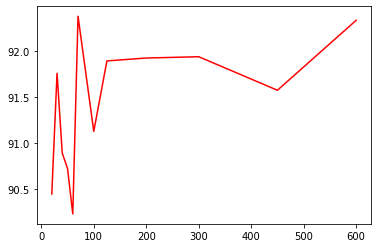

In [64]:
plt.plot(train_seg, np.mean(test_acc, axis=1), color='red')
plt.savefig('means.jpg')


In [42]:
plt.clf()

<Figure size 432x288 with 0 Axes>

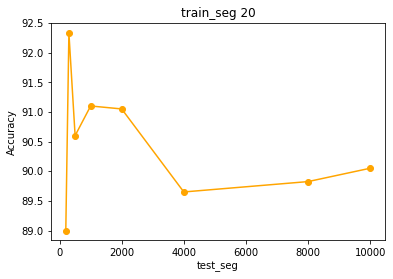

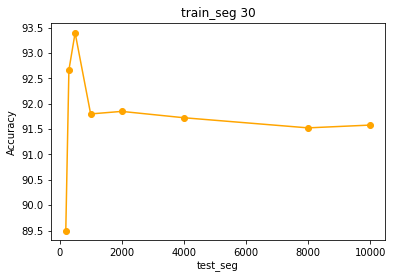

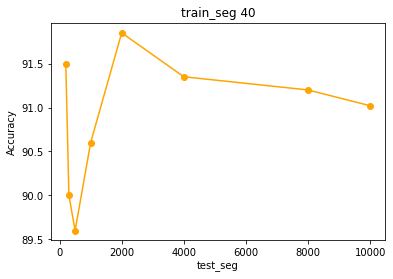

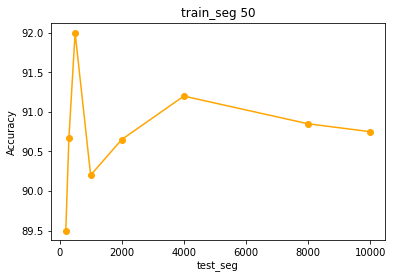

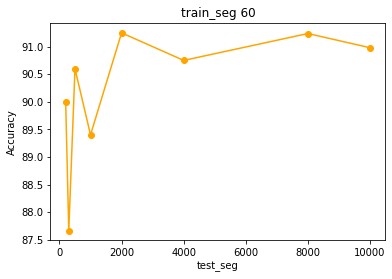

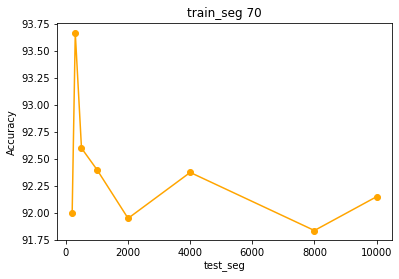

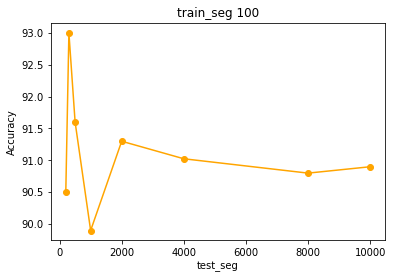

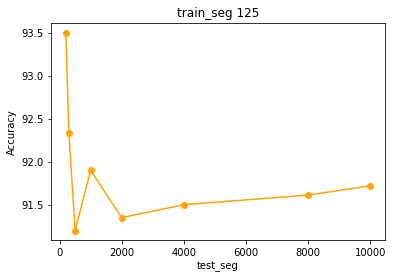

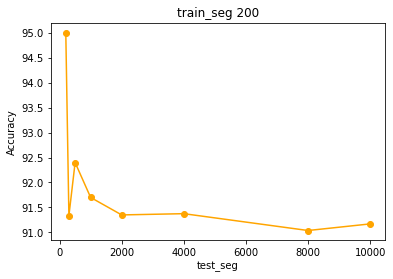

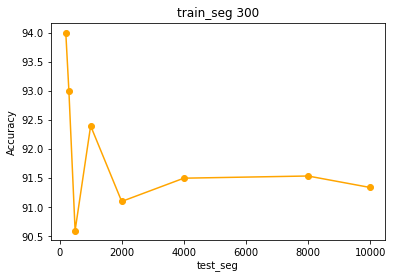

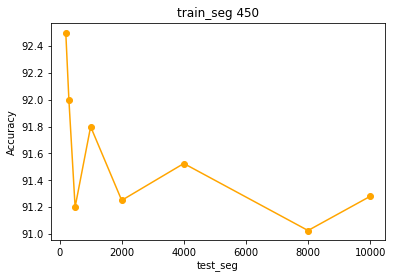

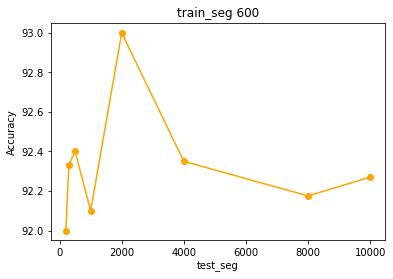

<Figure size 432x288 with 0 Axes>

In [98]:
test_segment = [200, 300, 500, 1000, 2000, 4000, 8000, 10000]
ii = 0
for train_segs in train_seg:
    plt.plot(test_segment,test_acc[ii], color="orange", marker="o")
    plt.title('train_seg ' + str(train_segs))
    plt.xlabel('test_seg')
    plt.ylabel('Accuracy')
    name = 'train_seg ' + str(train_segs) + '00.jpg'
    plt.savefig(name)
    ii += 1
    plt.show()
    plt.clf()